In [18]:
# import libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [19]:
# Only get Data Analyst jobs in the US
df_US = df[df["job_country"] == "United States"].dropna(subset=["salary_year_avg"])

In [20]:
job_titles = df_US["job_title_short"].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [21]:
df_US_top6 = df_US[df_US["job_title_short"].isin(job_titles)]


In [22]:
job_order = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

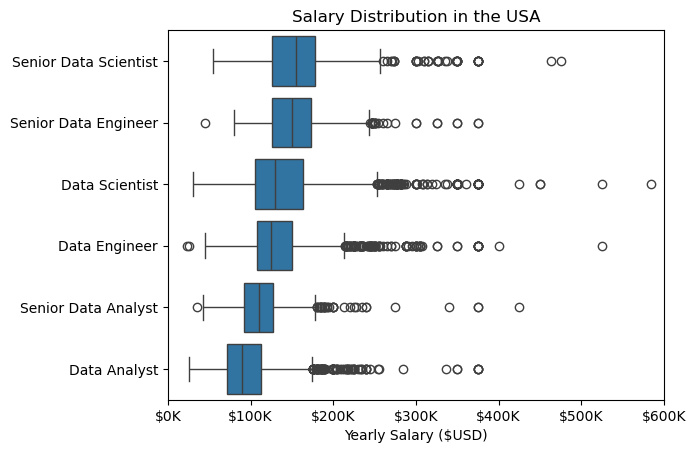

In [23]:
#plt.boxplot(job_list, labels=job_titles, vert=False)
sns.boxplot(data=df_US_top6, x="salary_year_avg", y="job_title_short", order=job_order ) # need to do x and y now! y is doing classes do the job titles
plt.title("Salary Distribution in the USA")
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0,600000)
plt.show()

In [24]:
# Only get Data Analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [25]:
df_DA_US = df_DA_US.explode("job_skills")

In [32]:
df_DA_top_pay = df_DA_US.groupby(by="job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="median", ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [33]:
df_DA_skills = df_DA_US.groupby(by="job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by="median", ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


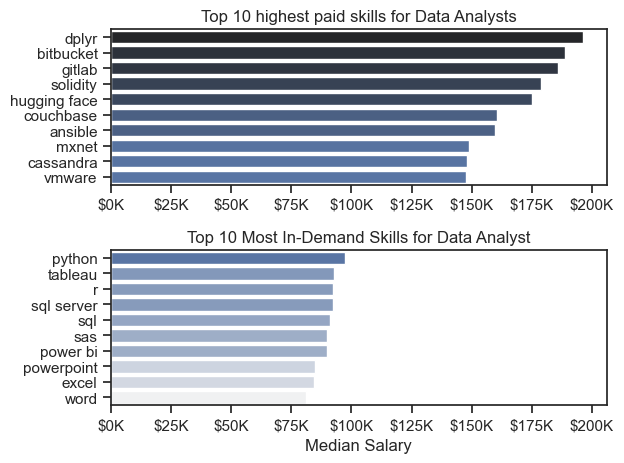

In [35]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="ticks")

#df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r", legend=False)
ax[0].set_title("Top 10 highest paid skills for Data Analysts")  #data seemed really bad anyway
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

#df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)
sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, ax=ax[1], hue="median", palette="light:b", legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analyst")  #data seemed really bad anyway
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.tight_layout() # couldn't think of this for a few moments